In [25]:
import pandas as pd
import numpy as np


# ML & preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [26]:
# Load dataset
df = pd.read_csv("digital_marketing_campaign_dataset.csv")
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [27]:
# Numerical → median
df.fillna(df.median(numeric_only=True), inplace=True)


# Categorical → mode
for col in df.select_dtypes(include='object'):
   df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\ABHIJITH\AppData\Local\Temp\ipykernel_20888\2056967546.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
for col in df.select_dtypes(include=np.number):
   Q1 = df[col].quantile(0.25)
   Q3 = df[col].quantile(0.75)
   IQR = Q3 - Q1
   df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

         CustomerID          Age         Income      AdSpend  \
count   7012.000000  7012.000000    7012.000000  7012.000000   
mean   11842.819167    43.634484   84861.301911  5133.750850   
std     2233.413386    14.867533   37539.953804  2834.132748   
min     8000.000000    18.000000   20014.000000   103.409243   
25%     9917.750000    31.000000   52235.500000  2682.533287   
50%    11830.500000    43.000000   85124.500000  5249.718686   
75%    13745.250000    56.250000  116985.750000  7555.075908   
max    15998.000000    69.000000  149985.000000  9997.914781   

       ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  \
count       7012.000000     7012.000000    7012.000000    7012.000000   
mean           0.158613        0.106308      25.177838       5.649945   
std            0.083192        0.054097      14.105787       2.565746   
min            0.010005        0.010059       0.000000       1.001882   
25%            0.088518        0.060157      14.000000    

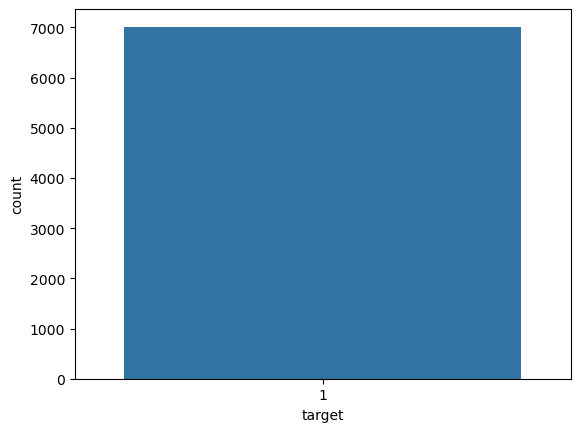

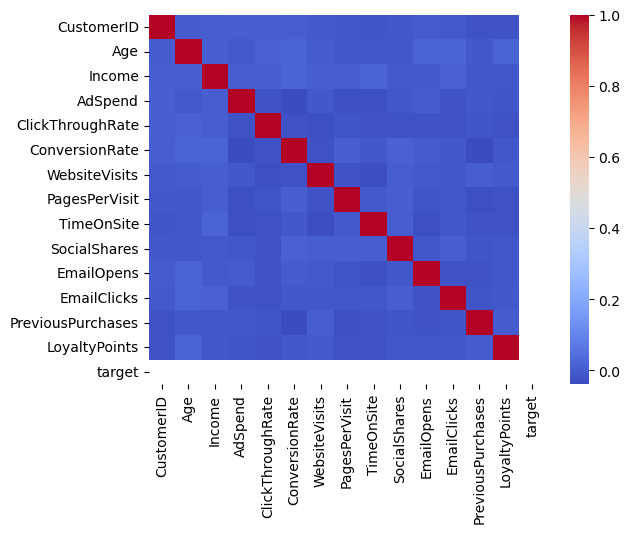

In [30]:
# Rename the actual target column
df.rename(columns={'Conversion': 'target'}, inplace=True)

# Statistical summary
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the target
sns.countplot(data=df, x='target')
plt.show()

# Heatmap of numeric correlations
sns.heatmap(df.select_dtypes(include='number').corr(), annot=False, cmap='coolwarm')
plt.show()


In [31]:
X = df.drop('target', axis=1)
y = df['target']

In [32]:
num_features = X.select_dtypes(include=np.number).columns
cat_features = X.select_dtypes(include='object').columns

In [33]:
preprocessor = ColumnTransformer([
('num', StandardScaler(), num_features),
('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [35]:
# Required imports
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [37]:
# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Identify column types
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns


In [38]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [39]:
pipe_lr = Pipeline([
    ('prep', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

param_lr = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs']
}

gs_lr = GridSearchCV(
    pipe_lr,
    param_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

gs_lr.fit(X_train, y_train)


ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
    ...<3 lines>...
    )
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(1)


In [ ]:
pipe_dt = Pipeline([
('prep', preprocessor),
('model', DecisionTreeClassifier())
])


param_dt = {
'model__max_depth': [None, 5, 10, 20],
'model__min_samples_split': [2, 5, 10]
}


gs_dt = GridSearchCV(pipe_dt, param_dt, cv=5, scoring='accuracy')
gs_dt.fit(X_train, y_train)

In [22]:
pipe_rf = Pipeline([
('prep', preprocessor),
('model', RandomForestClassifier())
])


param_rf = {
'model__n_estimators': [100, 200],
'model__max_depth': [None, 10, 20],
'model__min_samples_split': [2, 5]
}


gs_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring='accuracy', n_jobs=-1)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform',
       'AdvertisingTool'],
      dtype='object'))])),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy')

In [24]:
pipe_svm = Pipeline([
('prep', preprocessor),
('model', SVC())
])


param_svm = {
'model__C': [0.1, 1, 10],
'model__kernel': ['rbf', 'linear']
}


gs_svm = GridSearchCV(pipe_svm, param_svm, cv=5, scoring='accuracy')
gs_svm.fit(X_train, y_train)

ValueError: 
All the 30 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
    ~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 207, in fit
    y = self._validate_targets(y)
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\sklearn\svm\_base.py", line 751, in _validate_targets
    raise ValueError(
    ...<2 lines>...
    )
ValueError: The number of classes has to be greater than one; got 1 class


In [24]:
pipe_nb = Pipeline([
('prep', preprocessor),
('model', GaussianNB())
])


pipe_nb.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform',
       'AdvertisingTool'],
      dtype='object'))])),
                ('model', GaussianNB())])

In [25]:
pipe_knn = Pipeline([
('prep', preprocessor),
('model', KNeighborsClassifier())
])


param_knn = {
'model__n_neighbors': [3, 5, 7, 9],
'model__weights': ['uniform', 'distance']
}


gs_knn = GridSearchCV(pipe_knn, param_knn, cv=5, scoring='accuracy')
gs_knn.fit(X_train, y_train)

C:\Users\ABHIJITH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ABHIJITH\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\ABHIJITH\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABHIJITH\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['CustomerID', 'Age', 'Income', 'AdSpend', 'ClickThroughRate',
       'ConversionRate', 'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite',
       'SocialShares', 'EmailOpens', 'EmailClicks', 'PreviousPurchases',
       'LoyaltyPoints'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform',
       'AdvertisingTool'],
      dtype='object'))])),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 9],
                         'model__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [3]:
models = {
'Logistic Regression': gs_lr,
'Decision Tree': gs_dt,
'Random Forest': gs_rf,
'SVM': gs_svm,
'Naive Bayes': pipe_nb,
'KNN': gs_knn
}


results = []


for name, model in models.items():
y_pred = model.predict(X_test)
results.append({
'Model': name,
'Accuracy': accuracy_score(y_test, y_pred),
'Precision': precision_score(y_test, y_pred, average='weighted'),
'Recall': recall_score(y_test, y_pred, average='weighted'),
'F1': f1_score(y_test, y_pred, average='weighted')
})


results_df = pd.DataFrame(results)
results_df.sort_values(by='Accuracy', ascending=False)

IndentationError: expected an indented block after 'for' statement on line 14 (3388092748.py, line 15)